#Proyecto Kmeans



Problema:

Queremos ser capaces de clasificar casas según la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


In [ ]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv"
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
#No trabajaremos este proyecto con "Latitude", "Longitude", por ende seran
#eliminadas del df

df.drop(columns=["Latitude", "Longitude"], inplace=True)

Resultados:
Clusters: 1, Inercia: 26474636190.38, Ganancia relativa: ---
Clusters: 2, Inercia: 12547779125.42, Ganancia relativa: 52.60%
Clusters: 3, Inercia: 7385859844.57, Ganancia relativa: 41.14%
Clusters: 4, Inercia: 4885875649.69, Ganancia relativa: 33.85%
Clusters: 5, Inercia: 3672283094.04, Ganancia relativa: 24.84%
Clusters: 6, Inercia: 2579876643.27, Ganancia relativa: 29.75%
Clusters: 7, Inercia: 1919099305.41, Ganancia relativa: 25.61%
Clusters: 8, Inercia: 1438814638.88, Ganancia relativa: 25.03%
Clusters: 9, Inercia: 1119682644.58, Ganancia relativa: 22.18%
Clusters: 10, Inercia: 897567318.12, Ganancia relativa: 19.84%
Clusters: 11, Inercia: 745750540.30, Ganancia relativa: 16.91%


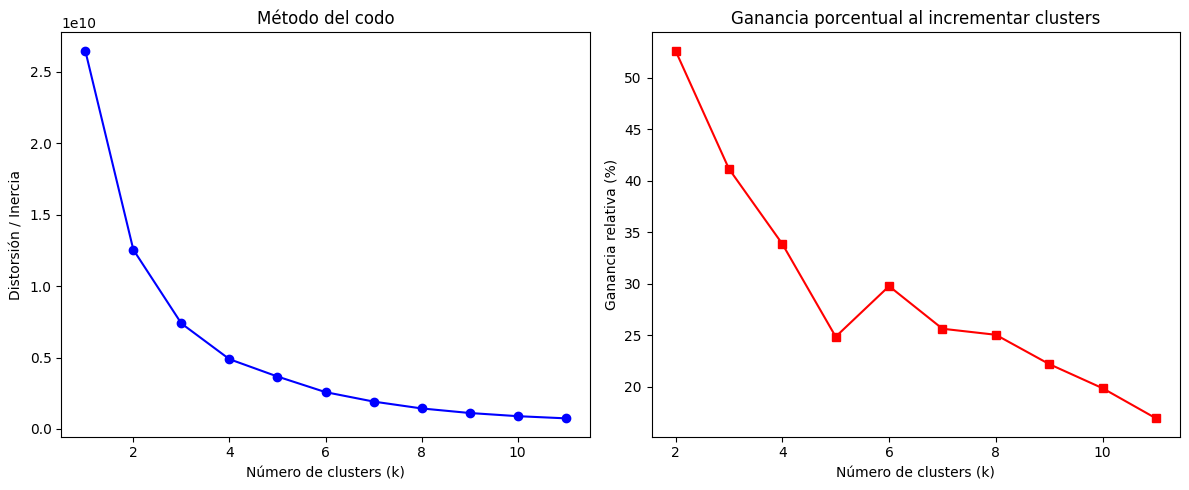

In [ ]:
#Metodo del Codo para calcular y graficar la inercia de KMeans para
#diferentes numeros de clusters (1 a 11), para asi elegir el numero de
#clusters mas adecuado para los datos

distortions = []
clusters_range = range(1, 12)

# Calcular la inercia para cada número de clusters
for i in clusters_range:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(df)
    distortions.append(km.inertia_)

# Calcular la ganancia relativa (porcentaje)
gains_pct = [(distortions[i-1] - distortions[i]) / distortions[i-1] * 100
             for i in range(1, len(distortions))]

# Mostrar resultados en consola: inercia y ganancia
print("Resultados:")
for k in clusters_range:
    if k == 1:
        print(f"Clusters: {k}, Inercia: {distortions[k-1]:.2f}, Ganancia relativa: ---")
    else:
        print(f"Clusters: {k}, Inercia: {distortions[k-1]:.2f}, Ganancia relativa: {gains_pct[k-2]:.2f}%")

# Gráfico de la inercia (método del codo)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(clusters_range, distortions, marker='o', color='blue')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión / Inercia')
plt.title('Método del codo')

# Gráfico de la ganancia relativa
plt.subplot(1,2,2)
plt.plot(clusters_range[1:], gains_pct, marker='s', color='red')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Ganancia relativa (%)')
plt.title('Ganancia porcentual al incrementar clusters')

plt.tight_layout()
plt.show()


Interpretacion:

La inercia mide la suma de las distancias cuadradas de cada punto a su centroide. Cuanto menor sea la inercia mejor ajustados estan los puntos a sus clusters.

En el metodo del codo se observa que mientras aumenta el numero de clusters, la inercia tiende a ser menor, el objetivo buscado, sin embargo viendo la segunda grafica sobre la Ganancia Porcentual al incrementar los Clusters, se aprecia que la ganancia disminuye drasticamente, en el 6to clusters sube un poco pero no significativo, por lo tanto el numero de cluster deberia estar 3 y 5.



Para probar lo anterior, vamos a utilizar la metrica de la silhouette (coeficiente de silueta) la cual nos permite evaluar la calidad de un clustering.

Para cada punto se calcula un valor entre -1 y 1, segun la siguiente clasificacion:

 Valor cerca de 1, puede decirse que el punto esta bien asignado, es decir muy cerca de su cluster y lejos de los demas.

 Valor cerca de 0, el punto esta en el limite entre clusters.

 Negativo, el punto probablemente esta mal asignado, ya que estaria mas cerca de otro cluter que del suyo.

Clusters: 2, Silhouette promedio: 0.707
Clusters: 3, Silhouette promedio: 0.606
Clusters: 4, Silhouette promedio: 0.561
Clusters: 5, Silhouette promedio: 0.561
Clusters: 6, Silhouette promedio: 0.540


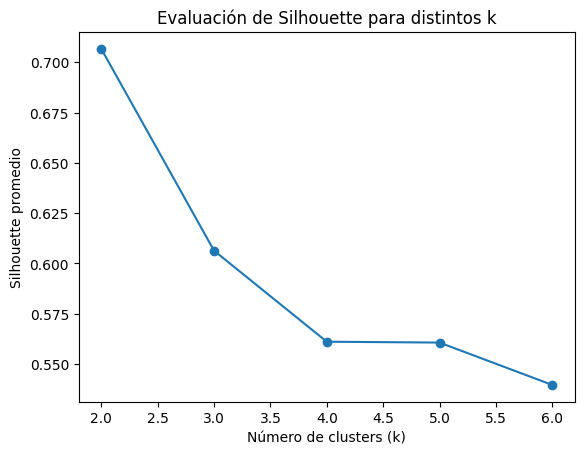

In [ ]:
#Grafico para ver el comportamiento de la silhouette_avgs en funcion del
#numero de clusters. Se probaran de 2 a 7 clusters


silhouette_avgs = []
clusters_range = range(2, 7)

for k in clusters_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    y_km = km.fit_predict(df)
    silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)
    silhouette_avgs.append(silhouette_avg)
    print(f"Clusters: {k}, Silhouette promedio: {silhouette_avg:.3f}")

# Visualizacion
plt.plot(list(clusters_range), silhouette_avgs, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette promedio')
plt.title('Evaluación de Silhouette para distintos k')
plt.show()


Interpretacion:

2 clusters: La Silhouette promedio alcanza su valor más alto (0.707), lo que indica una excelente separación entre grupos. Sin embargo, la inercia sigue siendo muy elevada (≈1.25e10), y aunque la ganancia relativa es la mayor (52.60%), este número de clusters resulta demasiado simplista para el caso de estudio.

3 clusters: La Silhouette promedio desciende a 0.606, aún dentro de un rango aceptable. La inercia baja a ≈0.74e10, con una ganancia relativa de 41.14%. Aquí se observa un buen equilibrio entre calidad de separación y reducción de inercia.

4 clusters: La Silhouette promedio disminuye a 0.561, mientras que la inercia se reduce a ≈0.49e10. La ganancia relativa es de 33.85%, lo que representa una mejora adicional de apenas 7.29% respecto a los 3 clusters. Esto indica que el beneficio de añadir un cuarto cluster es marginal.

Aunque 2 clusters ofrecen la mejor Silhouette, la inercia sigue siendo demasiado alta y el modelo sería excesivamente simple. En cambio, 3 clusters representan la opción más adecuada, ya que mantienen una buena calidad de separación (Silhouette = 0.606) y logran una reducción significativa de la inercia con una ganancia relativa del 41.14%. A partir de 4 clusters, las mejoras son mínimas y no justifican la complejidad adicional.






#Conclusion

Aunque 2 clusters ofrecen la mejor Silhouette, la inercia sigue siendo demasiado alta y el modelo sería excesivamente simple. En cambio, 3 clusters representan la opción más adecuada, ya que mantienen una buena calidad de separación (Silhouette = 0.606) y logran una reducción significativa de la inercia con una ganancia relativa del 41.14%. A partir de 4 clusters, las mejoras son mínimas y no justifican la complejidad adicional en el modelo.
